In [6]:
import os
import glob
import pandas as pd
import numpy as np
from pathlib import Path
#import matplotlib
#matplotlib.use('TkAgg')
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from IPython.display import Image


from fp.traindata_samplers import CompleteData
from fp.missingvalue_handlers import CompleteCaseAnalysis
from fp.missingvalue_handlers import MeanImputer
from fp.missingvalue_handlers import ModeImputer
from fp.missingvalue_handlers import DummyImputerNumerical
from fp.missingvalue_handlers import DummyImputerCategorical
from fp.dataset_experiments import PSIDDataset #AdultDatasetWhiteExperiment
from fp.scalers import NamedStandardScaler
from fp.learners import LogisticRegression
from fp.pre_processors import NoPreProcessing
from fp.post_processors import NoPostProcessing
from fp.dataset_experiments import AdultDatasetWhiteExperiment
from fp.dataset_experiments import SyntheticDataset

import fp.datadistribution_observer as data_obs




# Get experiment data

In [18]:
seed = 12345

_year = "11"
#_protected_attributes= [("hdrace", ["african"]), ("sprace", ["african"])]
_protected_attributes=[("hdrace", ["african", "american indian"]), ("sprace", ["african", "american indian"])]
_protected_attributes_for_classification=["headedu_" + _year, "spedu_" + _year, "hdrace"]

exp = PSIDDataset(
    fixed_random_seed=seed,
    train_data_sampler=CompleteData(),
    #missing_value_handler=[CompleteCaseAnalysis(), CompleteCaseAnalysis()],
    missing_value_handler=[MeanImputer, ModeImputer],
    missing_value_per_protected_class=True,
    numeric_attribute_scaler=NamedStandardScaler(),
    learners=[LogisticRegression()],
    pre_processors=[NoPreProcessing()],
    post_processors=[NoPostProcessing()],
    year=_year, 
    classification_target=("labels2", 2),
    protected_attributes=_protected_attributes,
    protected_attributes_for_classification=_protected_attributes_for_classification)
exp.run()

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


not_in_african_american indian    20942
african_american indian            3719
Name: eval_sprace, dtype: int64
TODO
Handle save info.
TODO
Handle save info.


C:\Users\Agathe Balayn\Documents\phd\projects\data_cleaning_bias\FairPrep\fp\missingvalue_handlers.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[self.protected_att] = (df[self.protected_att_list].values.astype(str).tolist())
C:\Users\Agathe Balayn\Documents\phd\projects\data_cleaning_bias\FairPrep\fp\missingvalue_handlers.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[self.protected_att] = df[self.protected_att].apply(lambda row: "_".join(row))
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\pandas\core\frame.py:3930: S

numerical_categorical_dispatcher_mean_imputation_mode_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result i

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.4min finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Agathe Balayn\Documents\phd\projects\data_cleaning_bias\FairPrep\fp\missingvalue_handlers.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[self.protected_att] = (df[self.protected_att_list].values.astype(str).tolist())
C:\Users\Agathe Balayn\Documents\phd\projects\data_cleaning_bias\Fair

numerical_categorical_dispatcher_mean_imputation_mode_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'spedu_11=1.0', 'spedu_11=2.0', 'headedu_11=1.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\Agathe Balayn\Documents\phd\projects\data_cleaning_bias\FairPrep\fp\missingvalue_handlers.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[self.protected_att] = (df[self.protected_att_list].values.astype(str).tolist())
C:\Users\Agathe Balayn\Documents\phd\projects\data_cleaning_bias\FairPrep\fp\missingvalue_handlers.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[self.protected_att] = df[self.protected_att].apply(lambda row: "_".join(row))
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\pandas\core\frame.py:3930:

numerical_categorical_dispatcher_mean_imputation_mode_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'spprob_11=0.05013927576601671', 'headprob_11=0.031746031746031744', 'headedu_11=1.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


In [2]:
# Tests with AdultDataset

seed = 12345
exp = AdultDatasetWhiteExperiment(
    fixed_random_seed=seed,
    train_data_sampler=CompleteData(),
    missing_value_handler=[MeanImputer, ModeImputer],
    missing_value_per_protected_class=False,    
    numeric_attribute_scaler=NamedStandardScaler(),
    learners=[LogisticRegression()],
    pre_processors=[NoPreProcessing()],
    post_processors=[NoPostProcessing()])
exp.run()

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income-per-year  
0          2174             0              40  United-States           <=50K  
1             0         

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result i

KeyError: 'eval_sprace'

In [2]:
# Test with the synthetic data generator.

seed = 12345

_protected_attributes=[("x_sens_0", ["1"]), ("x_sens_1", ["1"])]
_protected_attributes_for_classification=["x_sens_0"]
_discri_factor_protected_features = [np.pi / 4, np.pi/2]
_correlation_feature_scores_protected_features = [[0.2,0.9]]
_add_random_features = 1
_add_categorical_features = [2,1]
_nb_data=10000
_mu1=[2,2]
_sigma1=[[5, 1], [1, 5]]
_mu2=[0,1]
_sigma2=[[10, 1], [1, 3]]
training_missing_value = [("MAR_cat", "x_corr_cat_1", "x_corr_1", 0.33)]
test_missing_value = None
missing_value_synthesization = [training_missing_value, test_missing_value]



exp = SyntheticDataset(
    fixed_random_seed=seed,
    train_data_sampler=CompleteData(),
    #missing_value_handler=[CompleteCaseAnalysis(), CompleteCaseAnalysis()],
    missing_value_handler=[DummyImputerNumerical, DummyImputerCategorical],
    missing_value_per_protected_class=False,
    numeric_attribute_scaler=NamedStandardScaler(),
    learners=[LogisticRegression()],
    pre_processors=[NoPreProcessing()],
    post_processors=[NoPostProcessing()],
    data_existing_file=None,
    protected_attributes=_protected_attributes,
    protected_attributes_for_classification=_protected_attributes_for_classification,
    discri_factor_protected_features=_discri_factor_protected_features,
    correlation_feature_scores_protected_features=_correlation_feature_scores_protected_features,
    add_random_features=_add_random_features,
    add_categorical_features=_add_categorical_features,
    nb_data=_nb_data,
    mu1=_mu1,
    sigma1=_sigma1,
    mu2=_mu2,
    sigma2=_sigma2,
    plot_data=False,
    missing_value_injection=missing_value_synthesization
    
)
exp.run()

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Intended coefficient:  0.2
Spearmans correlation coefficient: 0.194
Samples are correlated (reject H0) p=0.00000000
Intended coefficient:  0.9
Spearmans correlation coefficient: 0.891
Samples are correlated (reject H0) p=0.00000000
-5.525993404734539 6.2171486754390966
-4.904980310320585 5.951300600408004
['x_0', 'x_1', 'x_corr_0', 'x_corr_1', 'x_sens_0', 'x_sens_1', 'label', 'x_uncorr_0', 'x_uncorr_cat_0', 'x_uncorr_cat_1', 'x_corr_cat_0', 'eval_x_sens_0', 'eval_x_sens_1']
Percentage of newly generated mising values: 0.12373196170881555


C:\Users\Agathe Balayn\Documents\phd\projects\data_cleaning_bias\FairPrep\fp\synthetic_data_generator.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  input_to_transform[list(df_condition.columns)[0]] = df_condition.copy(deep=True)


Percentage of newly generated mising values: 0.15787969709958566
Percentage of newly generated mising values: 0.12087441063009001
Percentage of newly generated mising values: 0.1471638805543649
Percentage of newly generated mising values: 0.32533219031290184
TODO
Handle save info.
TODO
Handle save info.


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\pandas\core\frame.py:3930: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\pandas\core\frame.py:3930: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True

numerical_categorical_dispatcher_mean_imputation_mode_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    3.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Agathe Balayn\Documents\phd\projects\data_cleaning_bias\FairPrep\fp\missingvalue_handlers.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[self.protected_att] = (df[self.protected_att_list].values.astype(str).tolist())
C:\Users\Agathe Balayn\Documents\phd\projects\data_cleaning_bias

numerical_categorical_dispatcher_mean_imputation_mode_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_corr_cat_1=x_corr_cat_1_cat_3', 'x_corr_cat_1=x_corr_cat_1_cat_7', 'x_corr_cat_1=x_corr_cat_1_cat_5', 'x_corr_cat_1=x_corr_cat_1_cat_6', 'x_corr_cat_1=x_corr_cat_1_cat_4', 'x_corr_cat_1=x_corr_cat_1_cat_1', 'x_corr_cat_1=x_corr_cat_1_cat_9', 'x_corr_cat_1=x_corr_cat_1_cat_8', 'x_corr_cat_1=x_corr_cat_1_cat_0', 'x_corr_cat_0=cat_0', 'x_corr_cat_1=x_corr_cat_1_cat_2'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\Agathe Balayn\Documents\phd\projects\data_cleaning_bias\FairPrep\fp\missingvalue_handlers.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[self.protected_att] = (df[self.protected_att_list].values.astype(str).tolist())
C:\Users\Agathe Balayn\Documents\phd\projects\data_cleaning_bias\FairPrep\fp\missingvalue_handlers.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df[self.protected_att] = df[self.protected_att].apply(lambda row: "_".join(row))
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\pandas\core\frame.py:3930:

numerical_categorical_dispatcher_mean_imputation_mode_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_corr_cat_1=x_corr_cat_1_cat_3', 'x_corr_cat_1=x_corr_cat_1_cat_5', 'x_corr_cat_1=x_corr_cat_1_cat_6', 'x_corr_cat_1=x_corr_cat_1_cat_4', 'x_corr_cat_1=x_corr_cat_1_cat_1', 'x_corr_cat_1=x_corr_cat_1_cat_9', 'x_corr_cat_1=x_corr_cat_1_cat_8', 'x_corr_cat_1=x_corr_cat_1_cat_0', 'x_corr_cat_1=x_corr_cat_1_cat_7'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


## First batch of experiments

In [189]:
# Test with the synthetic data generator.
import shutil

seed = 12345

_nb_data=10000
_protected_attributes=[("x_sens_0", ["1"])]
_protected_attributes_for_classification=["x_sens_0"]
_correlation_feature_scores_protected_features = []
_add_random_features = 0
_add_categorical_features = []
_mu1=[2,2]
_sigma1=[[5, 1], [1, 5]]
_mu2=[0,0]
_sigma2=[[2, 1], [1, 2]]

possible_discri_factor_protected_features = [[0], [np.pi/6], [np.pi/4], [np.pi/3], [np.pi/2]]
possible_training_missing_value = [[("MCAR", "x_0", 0.0)], [("MCAR", "x_0", 0.1)], \
                                   [("MCAR", "x_0", 0.3)], [("MCAR", "x_0", 0.5)],\
                                    [("MCAR", "x_0", 0.7)],\
                                   [("MCAR", "x_sens_0", 0.0)], [("MCAR", "x_sens_0", 0.1)], \
                                   [("MCAR", "x_sens_0", 0.3)], [("MCAR", "x_sens_0", 0.5)],\
                                    [("MCAR", "x_sens_0", 0.7)],\
                                   [("MNAR", "x_0", 0.0)], [("MNAR", "x_0", 0.1)], \
                                   [("MNAR", "x_0", 0.3)], [("MNAR", "x_0", 0.5)],\
                                    [("MNAR", "x_0", 0.7)],\
                                   [("MNAR", "x_sens_0", 0.0)], [("MNAR", "x_sens_0", 0.1)], \
                                   [("MNAR", "x_sens_0", 0.3)], [("MNAR", "x_sens_0", 0.5)],\
                                    [("MNAR", "x_sens_0", 0.7)],\
                                   [("MAR", "x_0", "x_sens_0", 0.0)], [("MAR", "x_0", "x_sens_0", 0.1)], \
                                   [("MAR", "x_0", "x_sens_0", 0.3)], [("MAR", "x_0", "x_sens_0", 0.5)],\
                                    [("MAR", "x_0", "x_sens_0", 0.7)],\
                                   [("MAR", "x_sens_0", "x_0", 0.0)], [("MAR", "x_sens_0", "x_0", 0.1)], \
                                   [("MAR", "x_sens_0", "x_0", 0.3)], [("MAR", "x_sens_0", "x_0", 0.5)],\
                                    [("MAR", "x_sens_0", "x_0", 0.7)]
                                  ]
test_missing_value = None
possible_missing_value_handler = [[DummyImputerNumerical, DummyImputerCategorical], [CompleteCaseAnalysis, CompleteCaseAnalysis]] 
nb_runs = 10
folder_experiments = "exp_in_batch_" + "1"
Path(folder_experiments).mkdir(parents=True, exist_ok=True)


for missing_value_handling in possible_missing_value_handler:
    for _discri_factor_protected_features in possible_discri_factor_protected_features:
        for training_missing_value in possible_training_missing_value:
            missing_value_synthesization = [training_missing_value, test_missing_value]

            
            
            for run_idx in range(nb_runs):
                
                exp = SyntheticDataset(
                    fixed_random_seed=seed,
                    train_data_sampler=CompleteData(),
                    #missing_value_handler=[CompleteCaseAnalysis(), CompleteCaseAnalysis()],
                    missing_value_handler=missing_value_handling,
                    missing_value_per_protected_class=False,
                    numeric_attribute_scaler=NamedStandardScaler(),
                    learners=[LogisticRegression()],
                    pre_processors=[NoPreProcessing()],
                    post_processors=[NoPostProcessing()],
                    data_existing_file=None,
                    protected_attributes=_protected_attributes,
                    protected_attributes_for_classification=_protected_attributes_for_classification,
                    discri_factor_protected_features=_discri_factor_protected_features,
                    correlation_feature_scores_protected_features=_correlation_feature_scores_protected_features,
                    add_random_features=_add_random_features,
                    add_categorical_features=_add_categorical_features,
                    nb_data=_nb_data,
                    mu1=_mu1,
                    sigma1=_sigma1,
                    mu2=_mu2,
                    sigma2=_sigma2,
                    plot_data=False,
                    missing_value_injection=missing_value_synthesization

                )
                exp.run()
                
                ### Move the file to the folder of the corresponding batch of experiment.
                # Find the latest folder.
                all_subdirs = [Path('logs/', d) for d in os.listdir(str(Path('logs/'))) if os.path.isdir(Path('logs/', d))]
                
                latest_subdir = max(all_subdirs, key=os.path.getmtime)
                # Create new folder if necessary.
                if missing_value_handling[0] == DummyImputerNumerical:
                    app = "dummy"
                else:
                    app = "complete"
                folder_to_put_in = Path(folder_experiments, "batch_" + str(run_idx) + "_" + app)
                folder_to_put_in.mkdir(parents=True, exist_ok=True)
                # Move the latest folder there.
                shutil.move(Path(latest_subdir), Path(str(folder_to_put_in), latest_subdir))
                


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    4.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    4.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    3.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    3.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    4.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    3.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    4.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    3.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    3.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    7.7s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    7.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    3.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    3.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    4.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    3.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    4.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   10.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    4.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    4.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.6s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    3.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    4.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    4.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  43 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    4.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    4.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)

numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_dummy_imputation_dummy_imputation removed 0 instances from validation data
Injecting zero columns for features not present {'x_sens_0=99999999.0'}
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 817 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 83 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 815 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 85 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 803 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 97 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 807 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 93 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 810 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 90 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 817 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 83 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 799 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 101 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 810 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 90 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 818 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 82 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 802 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 98 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2430 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 270 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2434 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 266 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2435 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 265 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2449 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 251 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2451 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 249 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2450 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 250 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2425 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 275 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2423 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 277 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2431 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 269 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2430 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 270 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4069 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 431 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4065 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 435 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4042 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 458 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4014 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 486 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4059 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 441 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4039 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 461 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4036 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 464 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4057 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 443 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4048 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 452 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4038 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 462 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5660 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 640 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5666 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 634 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5683 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 617 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5668 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5664 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 636 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5667 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 633 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5673 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 627 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5658 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 642 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5686 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 614 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5666 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 634 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 813 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 87 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 811 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 89 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 808 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 809 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 91 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 813 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 87 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 809 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 91 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 811 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 89 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 820 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 80 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 814 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 86 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 812 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 88 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2424 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 276 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2411 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 289 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2418 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 282 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2441 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 259 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2417 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 283 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2430 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 270 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2423 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 277 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2421 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 279 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2434 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 266 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2424 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 276 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4035 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 465 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4039 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 461 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4043 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4046 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 454 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4042 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 458 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4043 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4037 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 463 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4033 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 467 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4036 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 464 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4032 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 468 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5668 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5657 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 643 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5649 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 651 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5660 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 640 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5649 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 651 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5671 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 629 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5664 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 636 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5675 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 625 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5662 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 638 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5676 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 624 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1002 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 136 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1027 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 124 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1015 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 132 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1005 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 134 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1019 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 129 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1023 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 127 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1011 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 126 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1029 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 127 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1019 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 123 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1012 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 133 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2779 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 319 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2767 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 321 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2790 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 327 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2787 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 323 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2803 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 307 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2785 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 329 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2775 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 320 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2770 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 338 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2783 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 337 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2768 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 326 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4384 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 493 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4361 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 504 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4382 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 494 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4362 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 495 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4375 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 505 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4385 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 493 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4377 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 496 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4390 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 489 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4373 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 493 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4369 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 499 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5906 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 670 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5923 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 673 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5900 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 679 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5899 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 673 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5924 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 670 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5926 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 674 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5907 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 680 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5897 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 681 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5908 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 685 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5939 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 671 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1381 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 138 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1335 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 152 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1340 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 160 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1348 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 164 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1344 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 160 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1340 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 171 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1364 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 153 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1356 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 166 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1338 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 168 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1355 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 155 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 3029 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 347 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 3017 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 356 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 3023 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 338 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 3036 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 349 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 3037 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 339 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2995 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 367 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 3048 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 341 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 3052 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 338 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 3044 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 363 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 3026 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 354 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4421 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 484 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4422 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 464 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4397 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 491 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4407 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 485 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4448 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 493 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4403 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 496 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4431 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 497 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4448 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 481 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4414 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 475 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4417 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 490 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5837 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 645 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5838 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 630 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5801 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 651 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5807 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 629 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5784 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 652 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5815 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 640 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5804 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 650 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5820 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 643 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5773 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 670 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5814 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 618 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 817 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 83 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 819 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 81 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 800 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 100 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 804 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 96 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 815 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 85 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 814 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 86 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 813 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 87 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 813 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 87 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 816 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 84 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 820 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 80 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2429 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 271 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2445 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 255 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2417 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 283 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2444 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 256 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2419 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 281 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2404 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 296 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2421 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 279 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2440 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 260 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2425 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 275 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2434 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 266 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4061 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 439 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4055 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 445 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4046 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 454 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4047 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 453 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4044 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 456 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4066 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 434 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4041 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 459 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4049 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 451 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4046 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 454 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4049 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 451 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5667 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 633 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5663 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 637 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5654 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 646 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5674 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 626 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5679 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 621 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5662 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 638 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5679 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 621 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\aif360\metrics\dataset_metric.py:82: RuntimeWarning: invalid value encountered in double_scalars
  return metric_fun(privileged=False) / metric_fun(privileged=True)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


numerical_categorical_dispatcher_complete_case_complete_case removed 5661 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)



numerical_categorical_dispatcher_complete_case_complete_case removed 639 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5681 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 619 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5683 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 617 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 816 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 84 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 815 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 85 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 818 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 82 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 818 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 82 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 816 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 84 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 822 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 78 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 818 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 82 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 806 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 94 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 819 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 81 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 825 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 75 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2423 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 277 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2426 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 274 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2430 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 270 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2415 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 285 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2427 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 273 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2420 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 280 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2432 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2415 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 285 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2424 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 276 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2421 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 279 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4036 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 464 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4040 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 460 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4038 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 462 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4040 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 460 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4042 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 458 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4043 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4045 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 455 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4033 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 467 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4045 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 455 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4034 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 466 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5670 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 630 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5666 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 634 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5671 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 629 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5655 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 645 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5660 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 640 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5651 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 649 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5654 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 646 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5656 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 644 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5665 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 635 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5666 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 634 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1013 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 127 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1015 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 127 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1020 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 126 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1017 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 133 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1017 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 130 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1013 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 132 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1027 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 127 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1023 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 126 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1013 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 136 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1022 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 134 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2798 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 317 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2790 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 327 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2803 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 315 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2809 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 311 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2786 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 335 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2781 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 320 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2793 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 318 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2796 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 323 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2801 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 314 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2772 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 326 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4373 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 490 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4379 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 495 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4403 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 496 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4395 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 502 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4385 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 497 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4383 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 498 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4403 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 499 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4370 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 507 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4395 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 483 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4393 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 493 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5925 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 668 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5922 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 672 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5917 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 672 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5903 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 675 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5935 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 677 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5926 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 673 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5924 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 667 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5915 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 675 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5900 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 678 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5913 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 672 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1338 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 164 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1341 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 153 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1354 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 160 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1341 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 178 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1362 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 160 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1367 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 149 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1354 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 161 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1338 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 177 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1336 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 174 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1346 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 156 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 3028 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 334 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 3026 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 358 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 3033 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 331 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 3061 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 352 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 3019 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 351 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 3016 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 384 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 3051 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 330 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 3029 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 335 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 3038 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 340 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 3033 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 352 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4418 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 493 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4425 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 482 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4404 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 494 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4428 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 493 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4390 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 485 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4445 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 478 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4430 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 494 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4428 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 489 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4455 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 480 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4426 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 480 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5814 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 663 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5814 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 635 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5813 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 649 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5806 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 643 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5855 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 636 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5827 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 640 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5793 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 642 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5818 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 642 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5810 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 637 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5803 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 658 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    8.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 808 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 815 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 85 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 808 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 812 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 88 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 806 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 94 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 835 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 65 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 803 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 97 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 797 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 103 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 813 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 87 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 796 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 104 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2436 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 264 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2439 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 261 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2420 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 280 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2450 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 250 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2428 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 272 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2428 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 272 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2408 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 292 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2412 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 288 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2428 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 272 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2434 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 266 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4038 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 462 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4072 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 428 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4046 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 454 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4021 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 479 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4042 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 458 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4053 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 447 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4044 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 456 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4042 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 458 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4047 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 453 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4054 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 446 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5677 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 623 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5685 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 615 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5665 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 635 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5660 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 640 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5649 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 651 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5687 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 613 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5640 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 660 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\aif360\metrics\dataset_metric.py:82: RuntimeWarning: invalid value encountered in double_scalars
  return metric_fun(privileged=False) / metric_fun(privileged=True)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\aif360\metrics\dataset_metric.py:82: RuntimeWarning: invalid value encountered in double_scalars
  return metric_fun(privileged=False) / metric_fun(privileged=True)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5657 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 643 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5652 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 648 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5672 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 628 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 814 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 86 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 818 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 82 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 810 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 90 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 816 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 84 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 818 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 82 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 812 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 88 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 811 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 89 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 818 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 82 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 808 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 822 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 78 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2425 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 275 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2421 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 279 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2412 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 288 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2430 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 270 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2423 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 277 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2421 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 279 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2428 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 272 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2425 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 275 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2426 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 274 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2433 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 267 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4039 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 461 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4044 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 456 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4034 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 466 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4045 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 455 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4035 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 465 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4044 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 456 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4044 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 456 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4043 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4042 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 458 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4041 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 459 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5665 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 635 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5658 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 642 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5668 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5670 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 630 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5663 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 637 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5679 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 621 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5669 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 631 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5676 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 624 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5666 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 634 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5666 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 634 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1024 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 135 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1024 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 132 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1025 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 127 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1028 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 129 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1019 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 130 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1025 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 131 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1023 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 126 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1030 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 126 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1011 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 146 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1030 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 131 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2802 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 327 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2792 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 328 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2801 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 335 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2790 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 318 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2797 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 327 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2790 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 326 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2788 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 327 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2793 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 323 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2800 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 319 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2794 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 319 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4409 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 498 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4398 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 487 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4402 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 497 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4367 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 502 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4400 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 501 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4397 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 501 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4394 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 495 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4415 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 485 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4405 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 490 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4419 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 483 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5933 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 673 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5929 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 677 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5919 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 670 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5922 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 674 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5939 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 671 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5940 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 668 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5931 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 675 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5922 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 672 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5933 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 672 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5919 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 676 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1343 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 158 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1348 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 153 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1345 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 160 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1330 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 156 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1361 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 152 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1359 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 156 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1344 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 167 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1341 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 172 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1336 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 175 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1378 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 150 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2992 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 337 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 3027 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 344 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 3048 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 353 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 3024 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 354 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 3043 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 330 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 3014 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 355 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 3038 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 346 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 3029 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 337 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 3016 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 361 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 3022 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 349 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4392 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 476 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4388 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 495 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4407 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 476 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4425 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 490 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4440 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 467 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4400 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 469 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4403 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 493 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4453 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 475 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4389 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 484 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4399 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 497 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5805 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 645 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5821 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 642 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5815 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 631 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5824 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 639 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5832 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 657 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5831 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 642 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5805 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 641 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5805 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 642 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5789 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 643 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5816 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 645 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 805 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 95 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 811 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 89 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 800 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 100 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 811 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 89 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 818 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 82 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 811 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 89 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 800 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 100 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 816 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 84 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 814 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 86 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 824 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 76 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2435 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 265 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2416 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 284 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2427 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 273 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2434 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 266 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2428 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 272 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2410 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 290 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2432 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2425 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 275 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2441 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 259 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2412 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 288 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4056 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 444 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4046 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 454 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4066 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 434 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4052 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 448 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4022 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 478 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4057 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 443 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4047 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 453 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4030 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 470 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4070 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 430 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4067 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 433 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5658 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 642 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5637 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 663 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5655 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 645 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5662 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 638 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5649 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 651 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5686 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 614 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5679 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 621 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5659 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 641 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5654 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 646 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5657 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 643 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 813 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 87 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 812 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 88 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 812 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 88 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 811 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 89 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 806 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 94 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 823 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 77 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 822 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 78 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 814 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 86 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 810 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 90 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 818 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 82 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2421 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 279 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2416 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 284 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2427 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 273 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2420 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 280 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2421 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 279 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2441 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 259 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2426 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 274 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2428 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 272 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2419 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 281 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2417 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 283 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4045 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 455 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4050 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 450 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4058 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 442 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4043 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4043 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4046 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 454 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4039 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 461 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4034 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 466 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4049 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 451 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4039 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 461 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5671 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 629 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5657 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 643 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5672 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 628 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5653 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 647 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5662 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 638 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5669 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 631 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5646 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 654 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5661 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 639 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5672 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 628 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5665 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 635 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1026 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 133 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1036 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 130 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1025 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 133 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1018 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 140 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1024 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 129 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1021 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 132 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1019 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 131 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1032 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 127 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1026 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 131 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1041 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 128 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2791 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 329 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2806 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 324 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2802 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 322 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2782 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 325 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2803 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 323 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2783 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 327 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2788 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 322 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2804 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 330 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2794 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 320 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2811 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 318 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4397 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 495 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4410 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 483 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4423 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 489 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4401 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 493 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4411 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 501 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4408 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 492 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4400 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 496 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4404 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 496 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4398 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 506 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4414 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 503 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5934 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 680 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5950 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 666 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5926 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 677 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5945 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 677 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5935 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 674 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5942 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 668 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5923 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 677 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5944 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 669 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5922 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 674 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5947 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 666 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1342 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 160 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1349 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 162 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1352 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 163 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1354 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 159 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1340 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 156 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1344 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 171 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1360 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 156 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1341 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 161 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1381 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 145 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1364 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 149 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 3007 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 354 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 3031 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 335 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 3015 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 347 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 3055 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 349 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 3009 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 357 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 3029 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 354 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 3061 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 339 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 3033 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 339 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 3033 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 353 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 3038 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 352 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4406 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 487 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4433 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 484 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4390 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 482 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4440 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 482 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4429 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 479 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4391 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 488 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4421 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 485 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4395 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 471 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4436 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 483 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4449 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 468 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5808 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 643 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5804 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 655 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5801 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 659 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5819 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 629 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5797 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 668 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5807 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 635 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5833 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 649 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5817 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 646 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5831 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 644 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5824 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 636 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    2.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.103
numerical_categorical_dispatcher_complete_case_complete_case removed 838 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.7s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.306
numerical_categorical_dispatcher_complete_case_complete_case removed 2486 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 268 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.502
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.694
numerical_categorical_dispatcher_complete_case_complete_case removed 5614 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 632 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 809 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 91 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 812 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 88 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 812 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 88 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 806 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 94 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 808 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 92 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 819 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 81 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 816 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 84 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 806 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 94 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 794 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 106 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 809 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 91 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2429 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 271 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2439 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 261 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2396 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 304 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2410 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 290 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2441 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 259 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2428 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 272 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2414 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 286 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2445 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 255 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2427 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 273 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2441 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 259 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4026 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 474 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4041 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 459 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4016 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 484 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 438 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4040 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 460 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4039 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 461 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4072 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 428 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4062 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 438 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4056 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 444 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4032 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 468 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5663 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 637 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5695 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 605 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5677 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 623 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5672 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 628 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5663 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 637 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5645 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 655 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5691 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 609 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5671 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 629 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\aif360\metrics\dataset_metric.py:82: RuntimeWarning: invalid value encountered in double_scalars
  return metric_fun(privileged=False) / metric_fun(privileged=True)
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5666 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 634 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5681 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 619 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 819 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 81 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 815 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 85 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 821 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 79 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 814 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 86 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 818 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 82 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 814 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 86 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 814 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 86 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 807 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 93 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 807 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 93 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 805 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 95 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2422 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 278 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2416 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 284 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2426 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 274 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2420 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 280 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2422 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 278 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2416 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 284 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2422 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 278 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2415 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 285 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2424 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 276 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2430 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 270 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4040 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 460 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4045 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 455 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4042 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 458 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4043 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 457 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4047 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 453 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4040 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 460 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4045 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 455 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4052 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 448 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4042 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 458 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4029 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 471 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5665 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 635 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5650 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 650 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5657 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 643 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5661 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 639 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5665 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 635 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5658 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 642 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5670 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 630 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5666 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 634 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5653 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 647 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5661 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 639 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1033 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 125 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1025 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 131 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1027 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 136 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1022 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 131 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1031 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 124 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1026 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 131 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1034 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 133 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1020 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 134 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1026 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 138 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1027 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 131 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2792 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 322 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2804 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 316 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2803 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 318 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2797 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 333 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2795 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 319 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2787 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 316 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2792 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 324 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2800 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 330 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2820 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 325 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 2794 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 328 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4412 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 493 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4410 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 491 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4385 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 500 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4405 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 500 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4387 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 494 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4403 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 495 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4411 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 487 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4404 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 498 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4404 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 490 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4408 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 497 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5935 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 674 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5936 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 669 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5925 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 680 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5940 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 665 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5930 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 676 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5918 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.7s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 677 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5925 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 669 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5942 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 669 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5921 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 683 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5932 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 674 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.5s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.6s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.0
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1340 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 171 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1352 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 146 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1343 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 154 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1370 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.4s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 148 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1349 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 163 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1353 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 151 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1364 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.3s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 149 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1358 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 152 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1367 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.4s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 148 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.1
numerical_categorical_dispatcher_complete_case_complete_case removed 1357 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 158 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 3026 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 340 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 3001 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 359 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 3053 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 334 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 3023 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 362 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 3052 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 328 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 3018 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 361 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 3008 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 369 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 3044 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 334 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 3012 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 343 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.3
numerical_categorical_dispatcher_complete_case_complete_case removed 3014 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 356 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4433 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 473 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4418 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 478 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4434 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 484 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4393 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 495 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4402 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 483 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4426 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 479 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4421 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 484 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4421 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.2s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 483 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4413 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.1s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 488 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.5
numerical_categorical_dispatcher_complete_case_complete_case removed 4412 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 489 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5801 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 638 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5805 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 644 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5818 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 657 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5806 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 646 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5829 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    1.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 639 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5829 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.8s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 637 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5811 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 658 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5810 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    0.9s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 635 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5826 instances from training data
Fitting 5 folds for each of 12 candidates, totalling 60 fits

C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    1.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 636 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[[0. 0.]
 [1. 0.]]
Percentage of newly generated mising values: 0.7
numerical_categorical_dispatcher_complete_case_complete_case removed 5815 instances from training data


C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass copy=True, with_mean=True, with_std=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    2.0s finished
C:\Users\AGATHE~1\Envs\FAIRPR~1\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


numerical_categorical_dispatcher_complete_case_complete_case removed 631 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>
numerical_categorical_dispatcher_complete_case_complete_case removed 0 instances from validation data
Injecting zero columns for features not present set()
<class 'aif360.datasets.standard_dataset.StandardDataset'>
<class 'aif360.datasets.standard_dataset.StandardDataset'>


# Analysis of data distributions

In [35]:
# Get the folder with the most recent experiment.

def all_subdirs_of(b='.'):
    result = []
    for d in os.listdir(b):
        bd = os.path.join(b, d)
        if os.path.isdir(bd): 
            result.append(bd)
    return result



In [181]:
os.listdir(str(Path('logs/')))

['2020-05-27_13-04-59-908_psidafrican_american indian_african_american indian',
 '2020-05-27_15-11-46-255_psidafrican_american indian_african_american indian',
 '2020-05-27_15-15-17-488_psidafrican_american indian_african_american indian',
 '2020-05-27_15-40-39-086_psidafrican_american indian_african_american indian',
 '2020-05-27_15-53-28-228_adultwhite',
 '2020-05-27_15-58-07-250_adultwhite',
 '2020-05-27_18-24-08-524_adultwhite',
 '2020-05-27_18-24-48-879_psidafrican_american indian_african_american indian',
 '2020-05-27_18-33-15-875_adultwhite',
 '2020-05-27_18-33-44-014_psidafrican_american indian_african_american indian',
 '2020-05-27_18-35-15-169_psidafrican_american indian_african_american indian',
 '2020-05-27_18-38-10-345_psidafrican_american indian_african_american indian',
 '2020-05-27_18-40-24-995_psidafrican_american indian_african_american indian',
 '2020-05-27_19-00-44-907_psidafrican_american indian_african_american indian',
 '2020-05-27_19-04-37-559_psidafrican_americ

In [36]:
latest_subdir = max(all_subdirs_of("logs/"), key=os.path.getmtime)

# Get data raw
#data = pd.read_csv(glob.glob(latest_subdir + "/*-raw_training_data_distribution.csv")[0], index_col="Unnamed: 0")

# Get data sampled 
data = pd.read_csv(glob.glob(latest_subdir + "/*-raw_training_data_sampled_distribution.csv")[0], index_col="Unnamed: 0")


In [37]:
data.shape

(17262, 34)

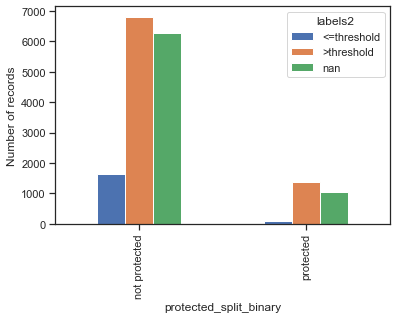

In [47]:
label_name = "labels2"

# Prepare the two datasets with protected/not protected.
protected_attributes = data_obs.getProtectedAttributes(data)
binary_condition = data_obs.createBinaryCondition(protected_attributes, data)
data_list_binary = [data.loc[binary_condition], data.loc[~binary_condition]]
data_name_binary = ["Protected elements", "Not protected elements"]
# Prepare the 4 datasets when there are 2 protected attributes.
if len(list(protected_attributes.keys())) == 2:
    list_condition, condition_names = data_obs.create4_4Conditions(protected_attributes, data)
    data_list_4 = []
    data_name_4 = []
    for cond, nm in zip(list_condition, condition_names):
        data_list_4.append(data.loc[cond])
        data_name_4.append(nm)


data_for_plot = data.copy(deep=True)
data_for_plot["protected_split_binary"] = np.nan
#data_for_plot.where(binary_condition, )#loc[data_for_plot.loc[binary_condition], "protected_split_binary"] = "protected"
#data_for_plot.loc[data_for_plot.loc[~binary_condition], "protected_split_binary"] = "not protected"
data_for_plot.loc[~binary_condition, "protected_split_binary"] = "not protected"
data_for_plot.loc[binary_condition, "protected_split_binary"] = "protected"
        
"""
# General data distribution:
distribution_data = pd.DataFrame({"population_type":data_name_4, "nb_data": [len(data) for data in data_list_4]})

distribution_data = pd.DataFrame({"population_type":data_name_binary, "nb_data": [len(data) for data in data_list_binary]})
"""

"""
fig, ax = plt.subplots(figsize=(5,5)) 
distribution_data.plot.bar(ax=ax, width=0.7)
ax.set_xticklabels( (distribution_data["population_type"].values.tolist()))
ax.set_ylabel('Number of data')

for i, v in enumerate(distribution_data["nb_data"]):
    ax.text(i - 0.1, v + 10, str(v), color='red', fontweight='bold')
ax.legend()
plt.setp(ax.get_xticklabels(), rotation=80)
plt.show()
"""

groupby_metric_type = data_for_plot.astype(str).groupby(["protected_split_binary", label_name])
aggregate_groupby = groupby_metric_type.size().unstack()
aggregate_groupby.plot(kind = "bar", title = "")
plt.ylabel("Number of records")
plt.show()



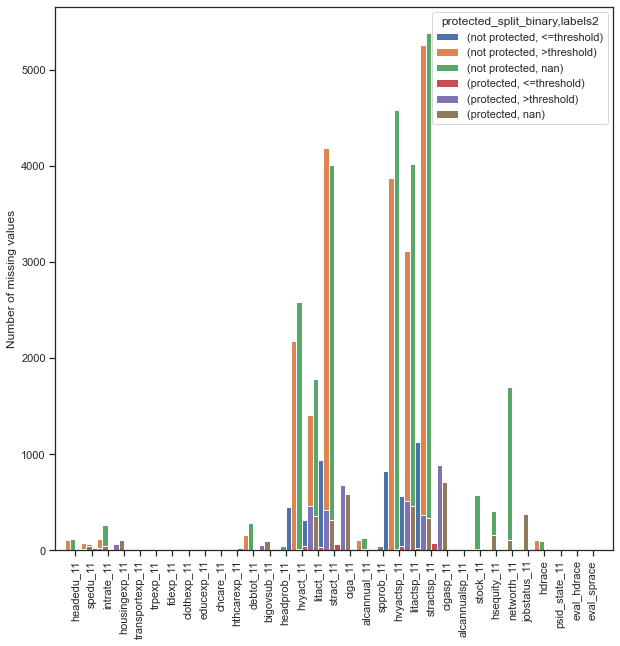

In [69]:
data_for_plot["protected_split_binary"] = data_for_plot["protected_split_binary"].astype(str)
data_for_plot[label_name] = data_for_plot[label_name].astype(str)
groupby_metric_type = data_for_plot.groupby(["protected_split_binary", label_name])

list_features = list(data_for_plot.columns)
list_features.remove("protected_split_binary")
list_features.remove(label_name)

aggregate_groupby = groupby_metric_type.agg({elem: lambda x: x.isnull().sum() for elem in list_features}).astype(float).T#.isnull().sum()/len(data_for_plot)

#print(aggregate_groupby)
#groupby_metric_type = data_for_plot.astype(str).groupby(["protected_split_binary", "labels2"])
#aggregate_groupby = groupby_metric_type.agg({'headedu_11': lambda x: x.isnull().sum()})#.isnull().sum()/len(data_for_plot)

fig_size=(10, 10)
fig, ax = plt.subplots(figsize=fig_size) 
aggregate_groupby.plot(kind = "bar", title = "", width=2, ax=ax)
plt.ylabel("Number of missing values")
plt.show()

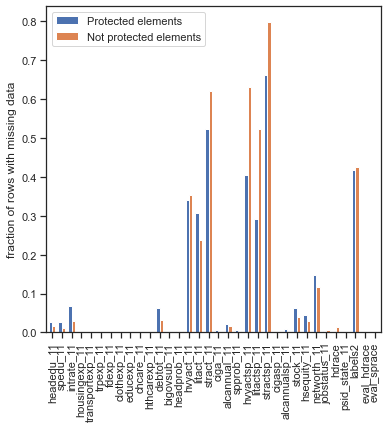

In [60]:
#plotMissingValueDistribution(data_list_binary, list_names=data_name_binary,fig_size=(14,10))
data_obs.plotMissingValueDistributionMergedTables(data_list_binary, data_name_binary, fig_size=(6,6))

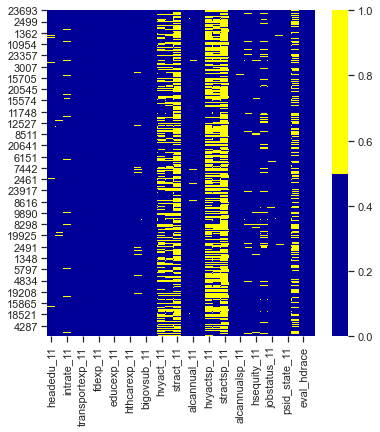

In [23]:
# Distribution per attribute.

#getNbMissingValues(data)
data_obs.plotMissingValueFeature([data], fig_size=(6,6))


2020-05-28 09:53:55,542 [WARNING]  No handles with labels found to put in legend.


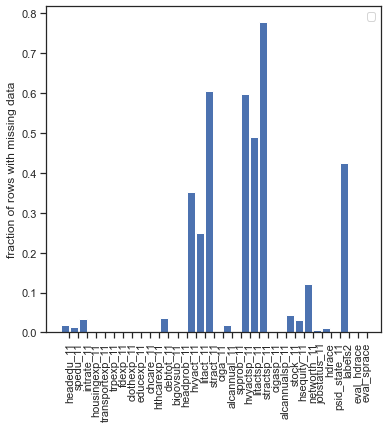

In [24]:
data_obs.plotMissingValueDistribution([data], fig_size=(6,6))

2020-05-28 09:53:56,246 [WARNING]  No handles with labels found to put in legend.
2020-05-28 09:53:57,497 [WARNING]  No handles with labels found to put in legend.


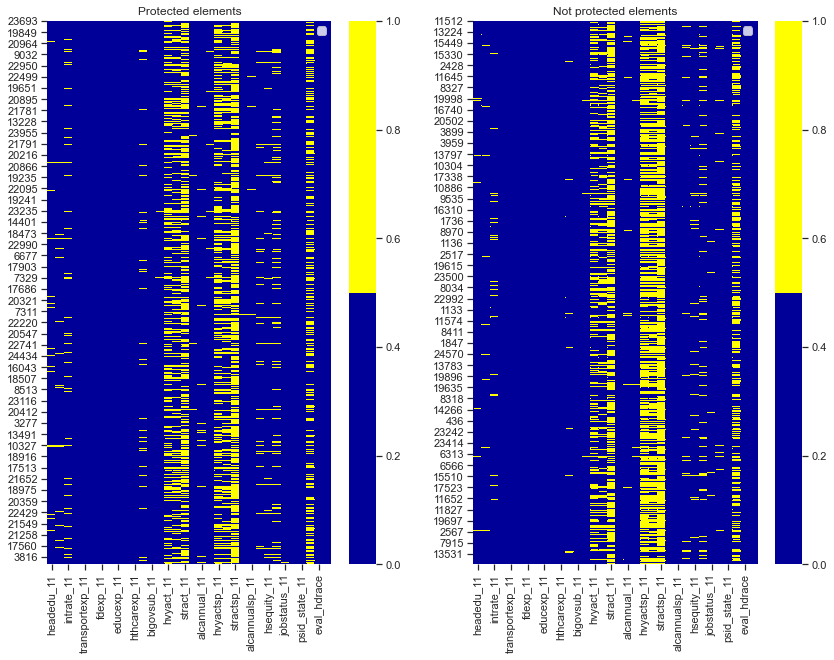

In [25]:
data_obs.plotMissingValueFeature(data_list_binary, list_names=data_name_binary, fig_size=(14,10))

In [26]:
#data_list_binary[0]

2020-05-28 09:54:06,502 [WARNING]  No handles with labels found to put in legend.
2020-05-28 09:54:08,140 [WARNING]  No handles with labels found to put in legend.
2020-05-28 09:54:11,522 [WARNING]  No handles with labels found to put in legend.
2020-05-28 09:54:13,421 [WARNING]  No handles with labels found to put in legend.


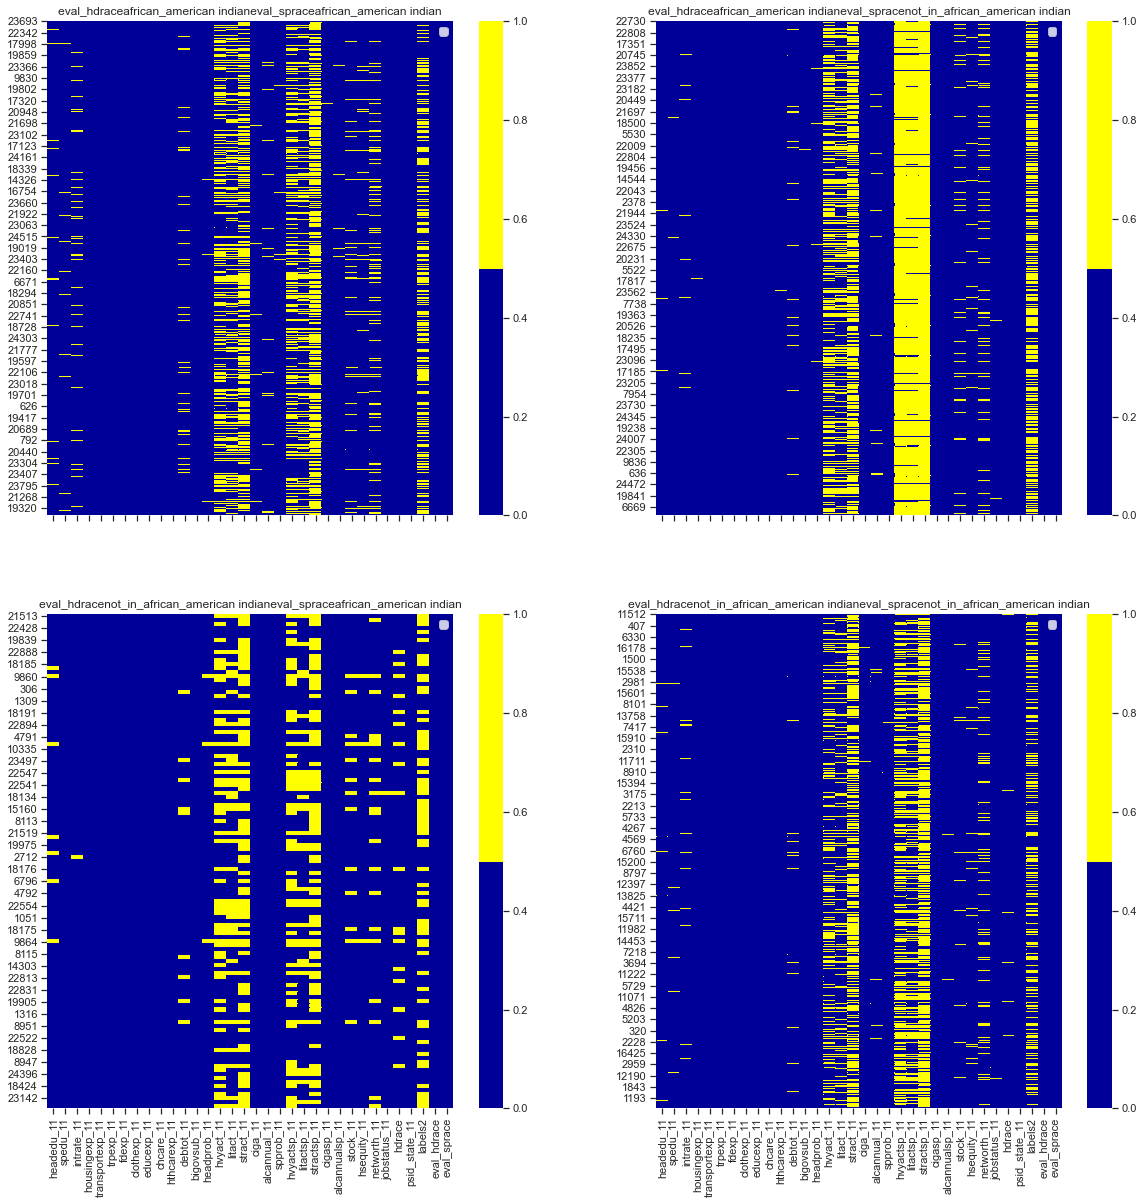

In [28]:
data_obs.plotMissingValueFeature(data_list_4, list_names=data_name_4, fig_size=(20,20))

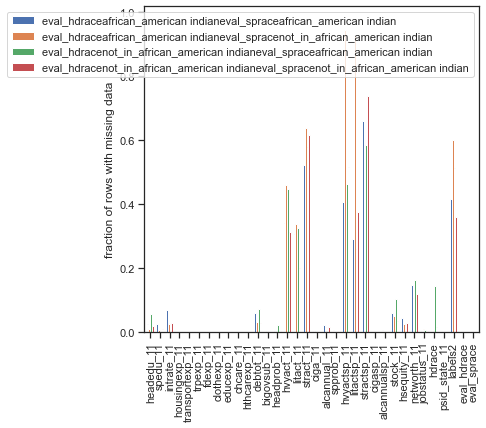

In [29]:
if len(list(protected_attributes.keys())) == 2:
    #plotMissingValueDistribution(data_list_4, list_names=data_name_4,fig_size=(14,10))
    data_obs.plotMissingValueDistributionMergedTables(data_list_4, data_name_4, fig_size=(6,6))

# Analysis of results

In [30]:
# Get results
latest_subdir = max(all_subdirs_of("logs/"), key=os.path.getmtime)

print(latest_subdir)
# Get data raw
#data = pd.read_csv(glob.glob(latest_subdir + "/*-raw_training_data_distribution.csv")[0], index_col="Unnamed: 0")

# Get data sampled 
data = pd.read_csv(glob.glob(latest_subdir + "/*_OPTIMAL.csv")[0], header=None, \
                  names=["data_split", "protected_type", "metric", "measure"])
# Boolean prescribing whether to condition this metric on the `privileged_groups`, 
# if `True`, or the `unprivileged_groups`, if `False`. 
# Defaults to `None` meaning this metric is computed over the entire dataset.

logs/2020-05-28_09-44-02-843_psidafrican_american indian_african_american indian


In [31]:
# Select what you want to observe
data_split = "test"

#protected_type = [None, True, False]
split_metric = ["true_positive_rate", "false_positive_rate", "accuracy" ]

general_metric = ["disparate_impact", "statistical_parity_difference", "error_rate_difference", "true_positive_rate_difference"]

#data["metric"].value_counts()
# Disparate impact: It compares the proportion of individuals that receive a positive output 
# statistical parity: A classifier satisfies this definition if subjects in both protected and \
# unprotected groups have equal probability of being assigned to the positive predicted class

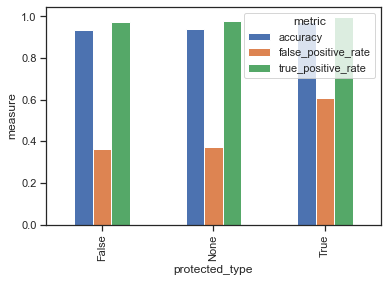

In [32]:
# Get the data
data_for_plot = data.loc[(data["data_split"] == data_split) & (data["metric"].isin(split_metric))]# (data["protected_type"].isin(protected_type))]# & (data["metric"].isin(split_metric))]
#data.loc[ (data["protected_type"] )]
#data_for_plot["metric type"] = data_for_plot["protected_type"].astype(str) + "_"+ data_for_plot["metric"]

#data_for_plot.plot(kind='bar', x='metric type', y='measure')


groupby_metric_type = data_for_plot.groupby(["protected_type", "metric"])
aggregate_groupby = groupby_metric_type['measure'].aggregate(np.sum).unstack()
aggregate_groupby.plot(kind = "bar", title = "")
plt.ylabel("measure")
plt.show()
#data_for_plot[["legend", "measure"]].plot(kind="bar", legend=True)

    data_split protected_type                         metric   measure
276       test            NaN  true_positive_rate_difference -0.021325
287       test            NaN          error_rate_difference  0.038094
289       test            NaN               disparate_impact  0.922125
290       test            NaN  statistical_parity_difference -0.076495


Text(0, 0.5, 'score')

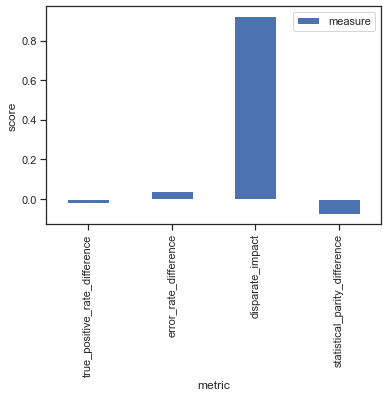

In [33]:
#data_for_plot = data.loc[(data["protected_type"] == np.nan) & (data["data_split"] == data_split) & (data["metric"].isin(general_metric))]# (data["protected_type"].isin(protected_type))]# & (data["metric"].isin(split_metric))]

data_for_plot = data.loc[(data["data_split"] == data_split) & (data["metric"].isin(general_metric))]# (data["protected_type"].isin(protected_type))]# & (data["metric"].isin(split_metric))]
print(data_for_plot)
data_for_plot.plot(kind='bar', x='metric', y='measure')
plt.ylabel("score")

# Visualisation of the first batch of experiments


In [ ]:
# List of parameters to vary.

possible_discri_factor_protected_features = [[0], [np.pi/6], [np.pi/4], [np.pi/3], [np.pi/2]]
possible_training_missing_value = [[("MCAR", "x_0", 0.0)], [("MCAR", "x_0", 0.1)], \
                                   [("MCAR", "x_0", 0.3)], [("MCAR", "x_0", 0.5)],\
                                    [("MCAR", "x_0", 0.7)],\
                                   [("MCAR", "x_sens_0", 0.0)], [("MCAR", "x_sens_0", 0.1)], \
                                   [("MCAR", "x_sens_0", 0.3)], [("MCAR", "x_sens_0", 0.5)],\
                                    [("MCAR", "x_sens_0", 0.7)],\
                                   [("MNAR", "x_0", 0.0)], [("MNAR", "x_0", 0.1)], \
                                   [("MNAR", "x_0", 0.3)], [("MNAR", "x_0", 0.5)],\
                                    [("MNAR", "x_0", 0.7)],\
                                   [("MNAR", "x_sens_0", 0.0)], [("MNAR", "x_sens_0", 0.1)], \
                                   [("MNAR", "x_sens_0", 0.3)], [("MNAR", "x_sens_0", 0.5)],\
                                    [("MNAR", "x_sens_0", 0.7)],\
                                   [("MAR", "x_0", "x_sens_0", 0.0)], [("MAR", "x_0", "x_sens_0", 0.1)], \
                                   [("MAR", "x_0", "x_sens_0", 0.3)], [("MAR", "x_0", "x_sens_0", 0.5)],\
                                    [("MAR", "x_0", "x_sens_0", 0.7)],\
                                   [("MAR", "x_sens_0", "x_0", 0.0)], [("MAR", "x_sens_0", "x_0", 0.1)], \
                                   [("MAR", "x_sens_0", "x_0", 0.3)], [("MAR", "x_sens_0", "x_0", 0.5)],\
                                    [("MAR", "x_sens_0", "x_0", 0.7)]
                                  ]
possible_missing_value_handler = [[DummyImputerNumerical, DummyImputerCategorical], [CompleteCaseAnalysis, CompleteCaseAnalysis], 

                                  
                                  

In [149]:
### Get the data from each experiment.
import os.path
import json

folder_exp_complete = Path("results_initial_exp_complete_3")
folder_exp_list_complete = [d for d in os.listdir(folder_exp_complete) if os.path.isdir(os.path.join(folder_exp_complete, d))]
folder_exp_dummy = Path("results_initial_exp_dummy_3")
folder_exp_list_dummy = [d for d in os.listdir(folder_exp_dummy) if os.path.isdir(os.path.join(folder_exp_dummy, d))]

# Get the metadata of all the experiments.
result_list = []
for folder in folder_exp_list_dummy:
    with open(glob.glob(os.path.join(folder_exp_dummy, folder, "**_meta_data.txt"))[0], "r") as read_file:
        meta_data = json.load(read_file)
    dictionary_exp = {"prot_att_correlation": meta_data["discri_factor_protected_features"][0], \
                     "missing_value_type": str(meta_data["missing_value_injection"]), \
                     "missing_value_handle": "dummy"}
    data = pd.read_csv(glob.glob(os.path.join(folder_exp_dummy, folder, "**_OPTIMAL.csv"))[0], header=None, \
                      names=["data_split", "protected_type", "metric", "measure"])
    split_metric = ["true_positive_rate", "false_positive_rate", "accuracy" ]
    general_metric = ["disparate_impact", "statistical_parity_difference", "error_rate_difference", "true_positive_rate_difference"]
    data_split = ["train", "test", "val"]
    prot_type = ["False", "True", "None"]
    for data_sp in data_split:
        for population in prot_type:
            for metric in split_metric:
                dictionary_exp[data_sp + "_" + (population) + "_" + metric] = (data.loc[(data["data_split"] == data_sp) & (data["protected_type"] == population) & (data["metric"] == metric), "measure"].values[0])# (data["protected_type"].isin(protected_type))]# & (data["metric"].isin(split_metric))]

    for data_sp in data_split:
        for metric in general_metric:
            dictionary_exp[data_sp + "_" + metric] = (data.loc[(data["data_split"] == data_sp) & (data["metric"] == metric), "measure"].values[0])# (data["protected_type"].isin(protected_type))]# & (data["metric"].isin(split_metric))]
    result_list.append(dictionary_exp)

for folder in folder_exp_list_complete:
    with open(glob.glob(os.path.join(folder_exp_complete, folder, "**_meta_data.txt"))[0], "r") as read_file:
        meta_data = json.load(read_file)
    dictionary_exp = {"prot_att_correlation": meta_data["discri_factor_protected_features"][0], \
                     "missing_value_type": str(meta_data["missing_value_injection"]), \
                     "missing_value_handle": "complete"}
    data = pd.read_csv(glob.glob(os.path.join(folder_exp_complete, folder, "**_OPTIMAL.csv"))[0], header=None, \
                      names=["data_split", "protected_type", "metric", "measure"])
    split_metric = ["true_positive_rate", "false_positive_rate", "accuracy" ]
    general_metric = ["disparate_impact", "statistical_parity_difference", "error_rate_difference", "true_positive_rate_difference"]
    data_split = ["train", "test", "val"]
    prot_type = ["False", "True", "None"]
    for data_sp in data_split:
        for population in prot_type:
            for metric in split_metric:
                dictionary_exp[data_sp + "_" + (population) + "_" + metric] = (data.loc[(data["data_split"] == data_sp) & (data["protected_type"] == population) & (data["metric"] == metric), "measure"].values[0])# (data["protected_type"].isin(protected_type))]# & (data["metric"].isin(split_metric))]

    for data_sp in data_split:
        for metric in general_metric:
            dictionary_exp[data_sp + "_" + metric] = (data.loc[(data["data_split"] == data_sp) & (data["metric"] == metric), "measure"].values[0])# (data["protected_type"].isin(protected_type))]# & (data["metric"].isin(split_metric))]
    result_list.append(dictionary_exp)
# Get the performance metrics for each experiment.
results3 = pd.DataFrame(result_list)


In [165]:
# Plots.
import seaborn as sns

def plotDistribution(data_result, missing_value_handle_type, metric, _center=None):
    # Filter the data needed.
    data = data_result.loc[data_result["missing_value_handle"] == missing_value_handle_type, ["missing_value_type", "prot_att_correlation", metric]].copy()
    data = data.astype({"missing_value_type":str})
    data = data.round(3)
    if "error_rate_difference" in metric:
        data[metric] = data[metric].abs()
    fig, ax = plt.subplots(figsize=(20,10)) 
    df_heatmap = data.pivot_table(values=metric,index='prot_att_correlation',columns='missing_value_type',aggfunc=np.sum)
    sns.heatmap(df_heatmap,annot=True, ax=ax, center=_center)
    plt.yticks(rotation=45)
    plt.show()
    

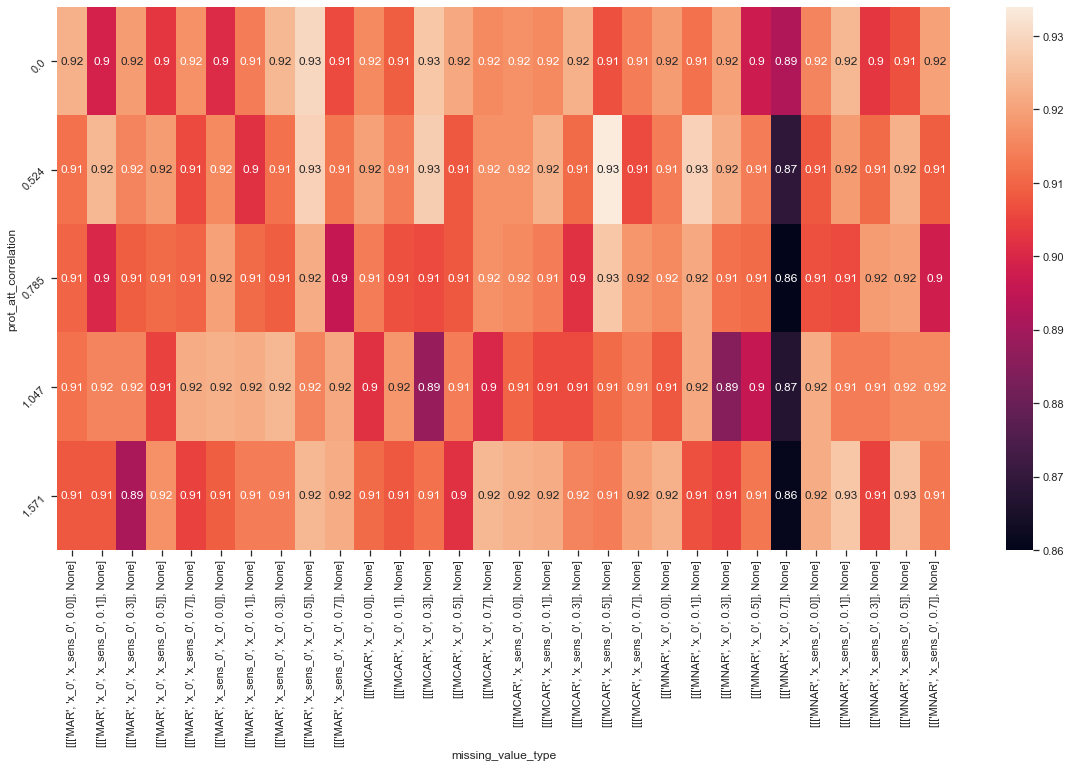

In [153]:
missing_value_handle_type = "complete" #"dummy"
metric = "test_None_accuracy"

plotDistribution(results, missing_value_handle_type, metric)

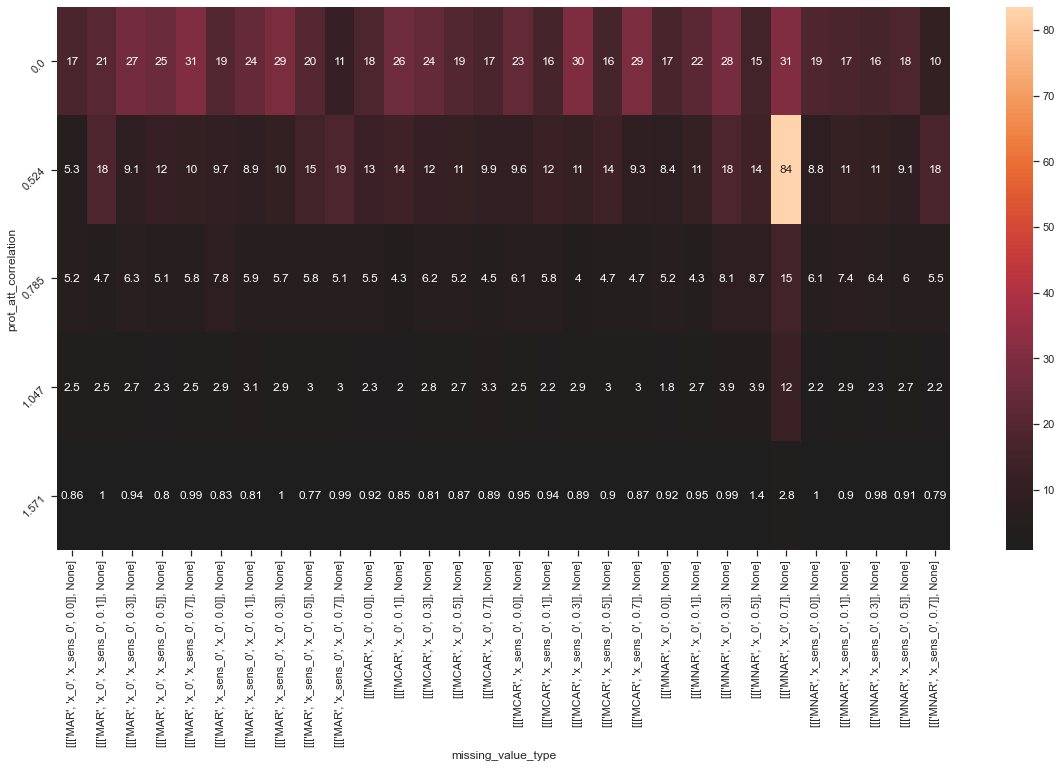

In [166]:
missing_value_handle_type = "complete" #"dummy"
metric = "test_disparate_impact"

plotDistribution(results, missing_value_handle_type, metric, 1)

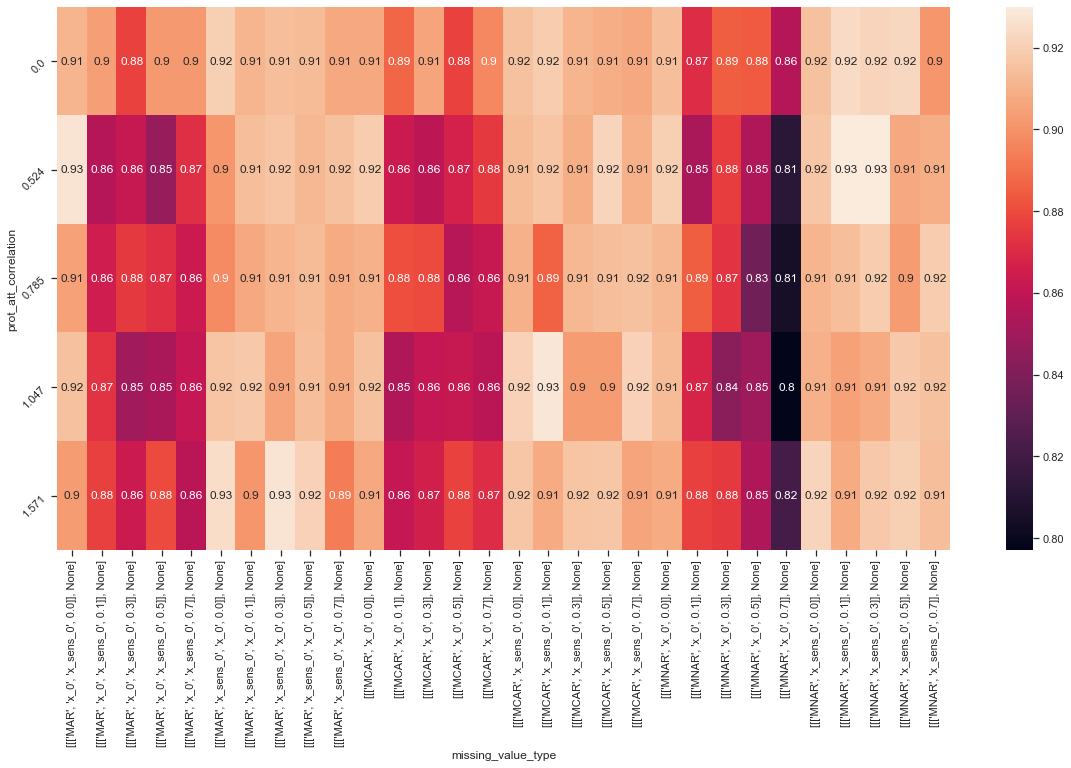

In [190]:
missing_value_handle_type = "dummy" #"dummy"
metric = "test_None_accuracy"

plotDistribution(results2, missing_value_handle_type, metric)

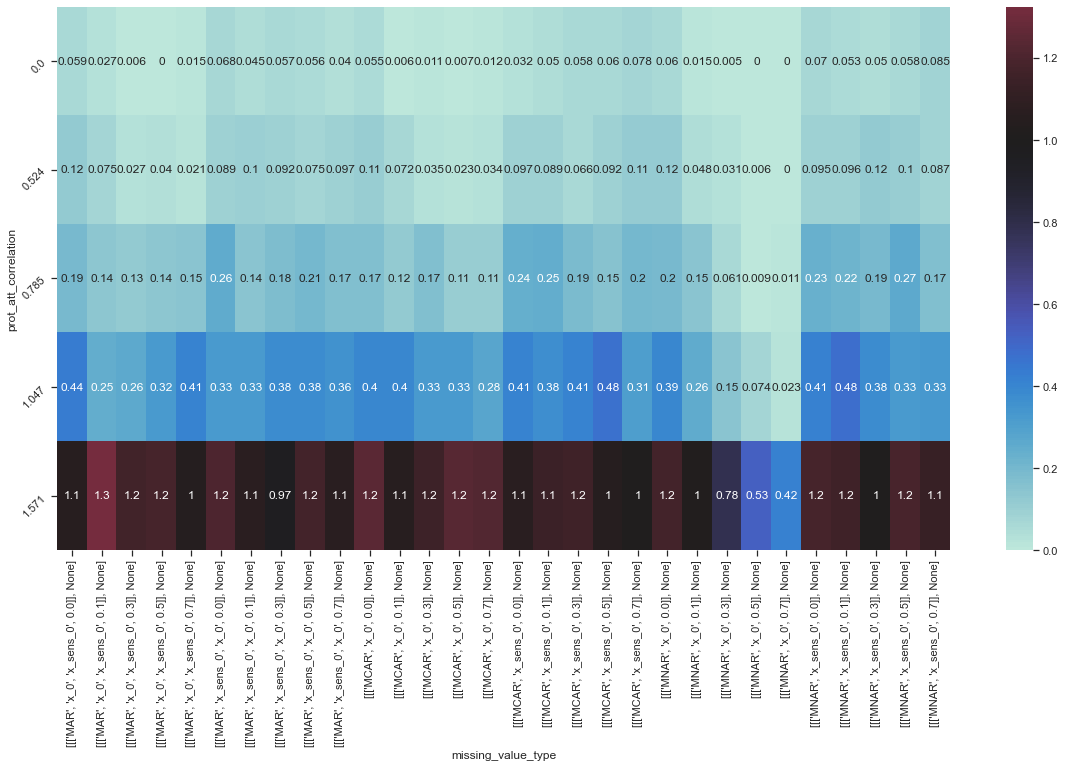

In [191]:
metric = "test_disparate_impact"

plotDistribution(results2, missing_value_handle_type, metric, 1)

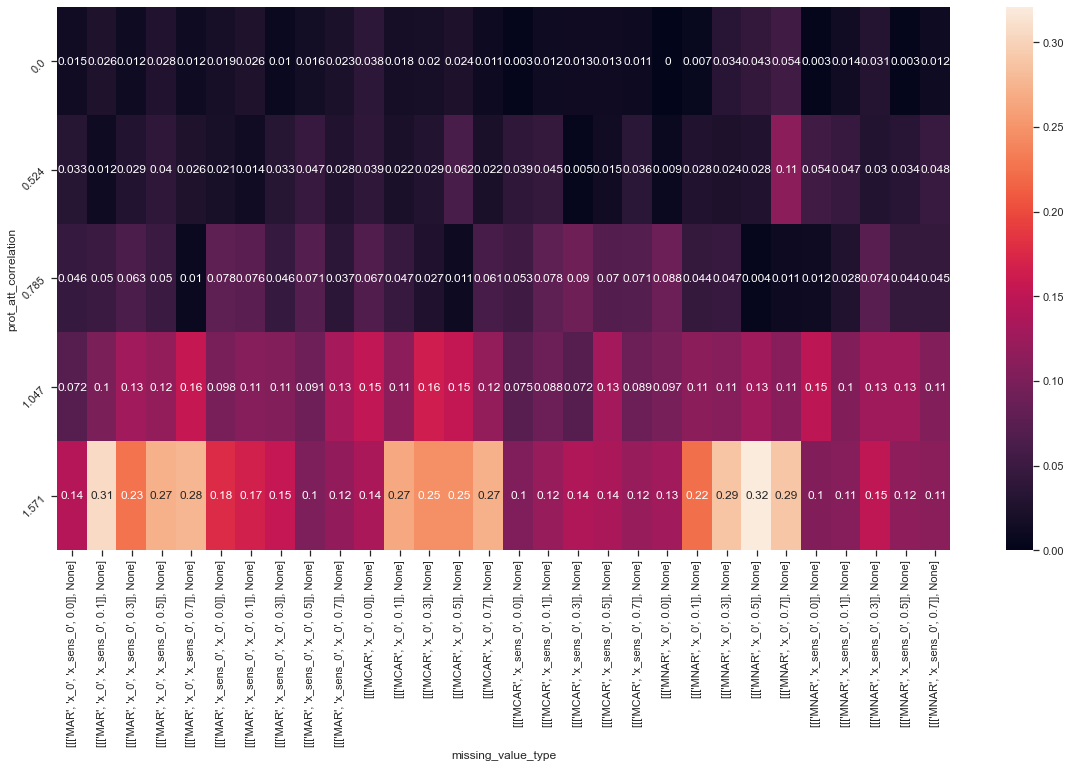

In [192]:
metric = "test_error_rate_difference"

plotDistribution(results2, missing_value_handle_type, metric)

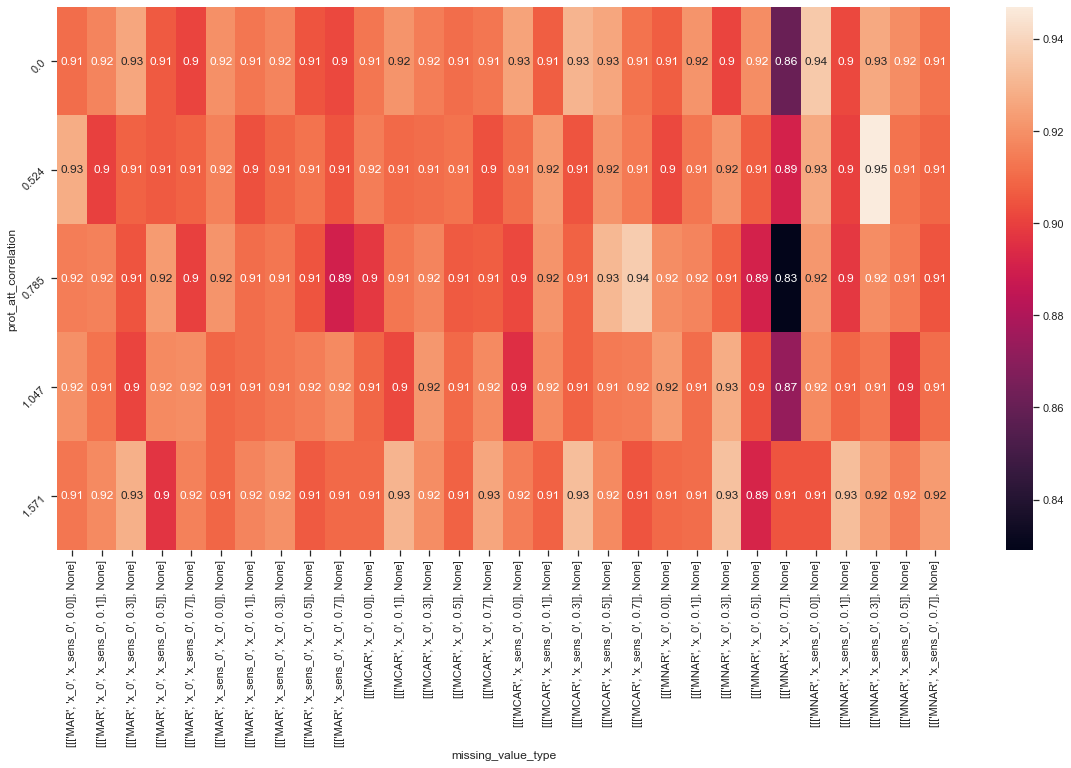

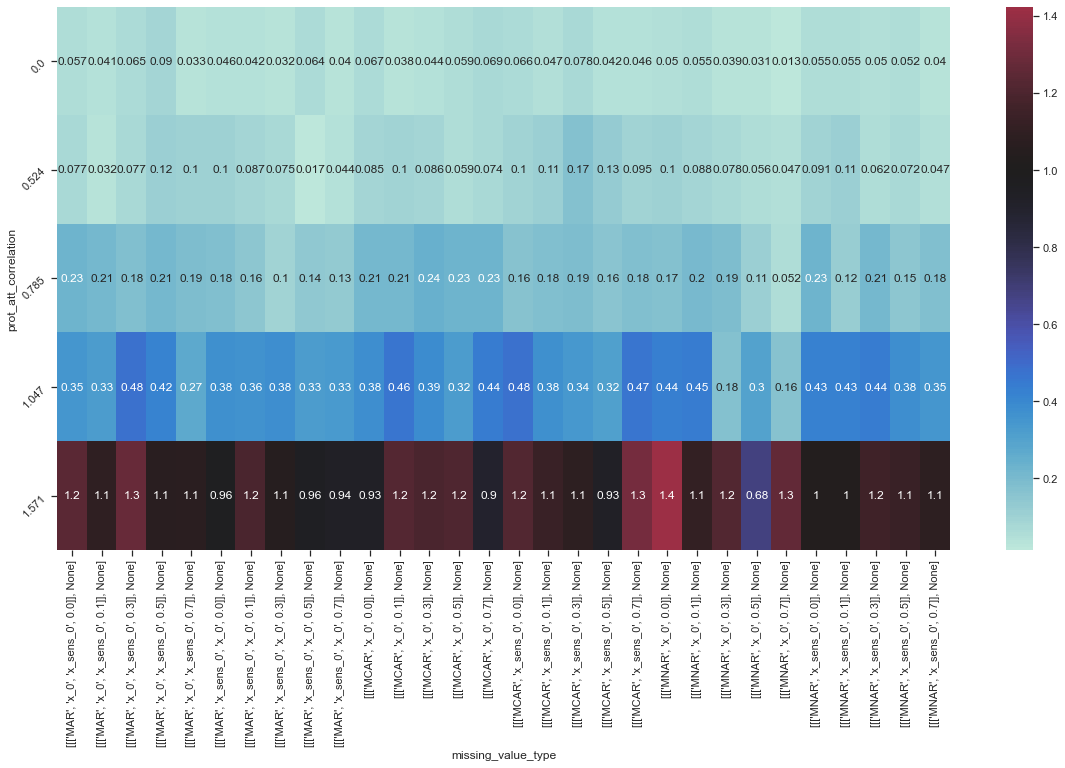

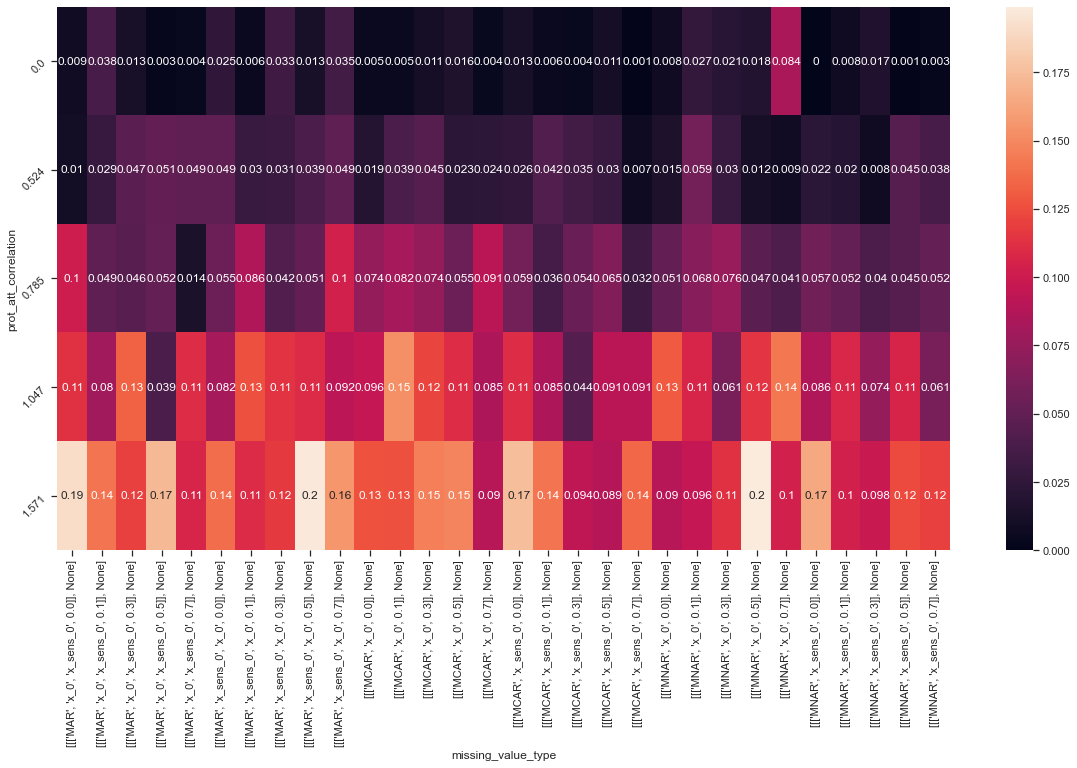

In [193]:
missing_value_handle_type = "complete" #"dummy"
metric = "test_None_accuracy"

plotDistribution(results2, missing_value_handle_type, metric)

metric = "test_disparate_impact"

plotDistribution(results2, missing_value_handle_type, metric, 1)

metric = "test_error_rate_difference"

plotDistribution(results2, missing_value_handle_type, metric)

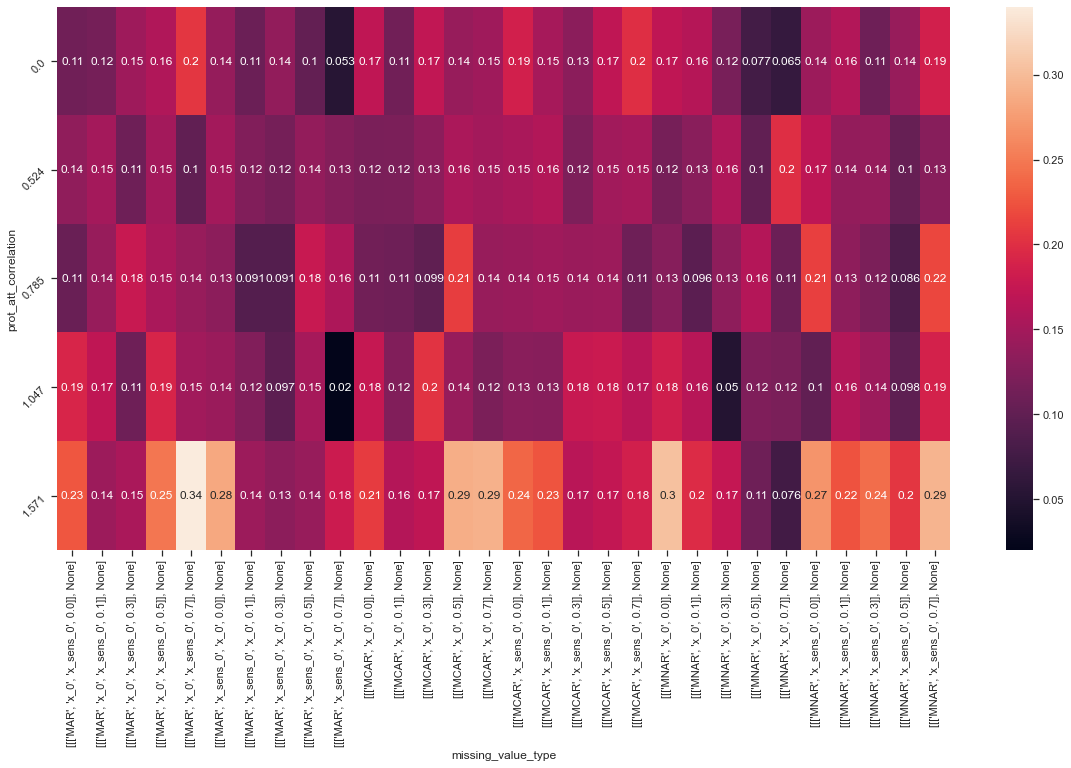

In [158]:
missing_value_handle_type = "complete" #"dummy"
metric = "test_disparate_impact"

plotDistribution(results3, missing_value_handle_type, metric)

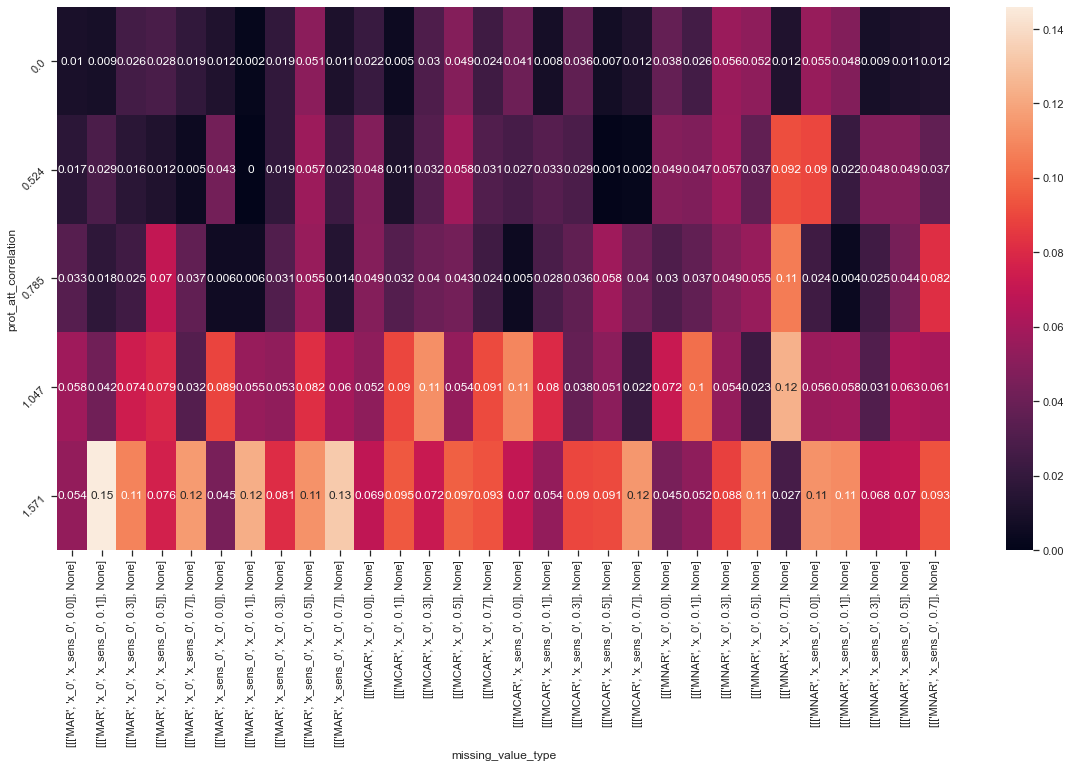

In [164]:
missing_value_handle_type = "complete" #"dummy"
metric = "test_error_rate_difference"

plotDistribution(results3, missing_value_handle_type, metric)

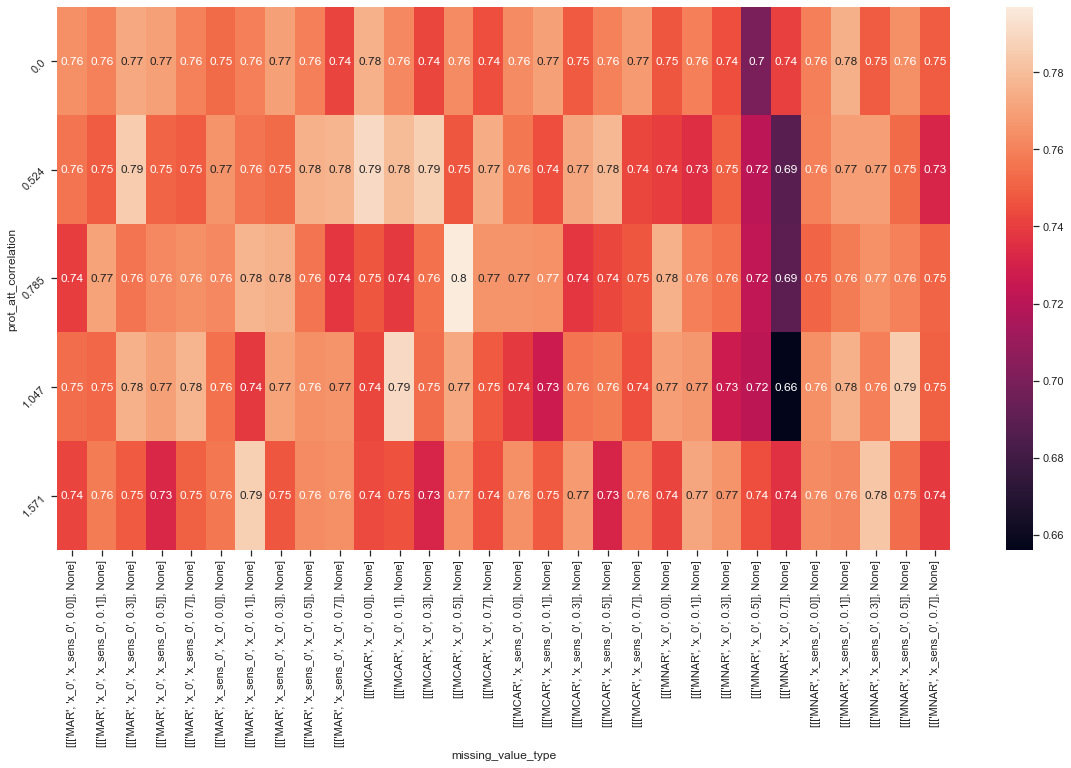

In [163]:
missing_value_handle_type = "complete" #"dummy"
metric = "test_None_accuracy"

plotDistribution(results3, missing_value_handle_type, metric)